In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from enum import Enum
import os
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
ls

 2updated_nouman_acc1.png             MobileNet.h5
 3updated_nouman_acc1.png             More_Dataset/
 CNN_Model.png                        nnouman_acc2.png
 code_Resnet_code.ipynb               nnouman_loss_2.png
 Covid-19_Face_mask_detection.ipynb   nouman_acc1.png
 Face_make_TKinter/                   nouman_loss_1.png
 FaceMaskAgePre_Tkinter/              PreTrain_Models.ipynb
'Face Mask Dataset'/                  python_tkinter_code.py
 FaceMask_Dataset/                    Resnet_code.ipynb
 FaceMask_detection.zip               RESNET.h5
 foo.png                              updated_code-13072022/
 GOOGLENET_code.ipynb                 updated_nouman_acc1.png
 GOOGLENET.h5                         VGG16_code.ipynb
 mobileNet_code.ipynb                 VGG16.h5
 Mobile_net.h5


In [6]:
class CNN_TYPE(Enum):
    VGGNET = 1
    GOOGLENET = 2
    RESNET = 3
    MOBILENET = 4  

#### The CNN_TYPE class is an enumeration that defines four different types of Convolutional Neural Networks (CNNs):

VGGNET: A deep CNN architecture that uses many 3x3 convolutional layers with small filters, followed by pooling layers and fully connected layers.
GOOGLENET: A CNN architecture that uses "Inception modules," which are composed of multiple layers with different filter sizes and pooling operations to extract features from the input image.
RESNET: A CNN architecture that uses "residual connections" to avoid the degradation of the network's performance as the number of layers increases.
MOBILENET: A CNN architecture that uses depthwise separable convolutions to reduce the number of parameters in the network, making it more efficient to run on mobile devices.
The CNN_TYPE class assigns a unique integer value to each CNN type, which can be used to identify the type of CNN being used in the code. For example, if a function takes a CNN_TYPE argument, you can pass in CNN_TYPE.VGGNET to indicate that you want to use the VGGNET architecture.

In [7]:
#This line of code creates a variable current_cnn_type and assigns it the value 
#The value of current_cnn_type can later be used to identify which architecture is being used in the code.
current_cnn_type = CNN_TYPE.GOOGLENET

In [2]:
#current_cnn_type is a variable that stores the type of Convolutional Neural Network (CNN) that is 
#currently being used in the code. It is defined as an instance of the CNN_TYPE enumeration class, 
#which contains four possible values representing four different CNN architectures - VGGNET, GOOGLENET, 
#RESNET, and MOBILENET.
current_cnn_type

In [9]:
IMG_SHAPE = (224, 224, 3)

def get_cnn_mode(type, image_shape):
    """
    Returns the pre-processing function and base CNN model for the given type of CNN and image shape.

    Parameters:
        type (CNN_TYPE): The type of CNN to use.
        image_shape (tuple): The shape of the input image to the CNN.

    Returns:
        preprocess_input (function): A pre-processing function for the input image.
        model (Model): The base CNN model to extract features from the input image.
    """

    # Initialize variables for pre-processing function and CNN model
    preprocess_input = []
    model = []

    # Check which type of CNN is being used and set pre-processing function and model accordingly
    if type == CNN_TYPE.VGGNET:
        preprocess_input = tf.keras.applications.vgg16.preprocess_input
        model = tf.keras.applications.VGG16(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')
    elif type == CNN_TYPE.GOOGLENET:    
        preprocess_input = tf.keras.applications.inception_v3.preprocess_input
        model = tf.keras.applications.InceptionV3(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')
    elif type == CNN_TYPE.RESNET:    
        preprocess_input = tf.keras.applications.resnet50.preprocess_input
        model = tf.keras.applications.ResNet50(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')
    elif type == CNN_TYPE.MOBILENET:    
        preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
        model = tf.keras.applications.MobileNetV2(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')
    else:
        preprocess_input = tf.keras.applications.vgg19.preprocess_input
        odel = tf.keras.applications.MobileNetV2(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')

    return preprocess_input, model


# Define the shape of the input image to the CNN
IMG_SHAPE = (224, 224, 3)

# Get the pre-processing function and base CNN model for the current CNN type and input image shape
preprocess_input, base_model = get_cnn_mode(current_cnn_type, IMG_SHAPE)


##### The get_cnn_mode function takes two arguments - the type of CNN to be used (type) and the shape of the input image to the CNN (image_shape). The function checks the type of CNN requested and sets the corresponding value for the preprocess_input and model variables.

If the requested CNN type is VGGNET, the function sets preprocess_input to the preprocess_input function for VGG16, and sets model to a pre-trained VGG16 model with the given image_shape. Similarly, if the requested CNN type is GOOGLENET, RESNET, or MOBILENET, the function sets preprocess_input and model accordingly using the corresponding functions and models from the Keras library. If the requested CNN type is invalid or unrecognized, the function falls back on using the MobileNetV2 architecture as a default.

The function returns the selected preprocess_input function and the selected CNN model.

In [11]:
"""
Initialize the initial learning rate, number of epochs to train for, batch size,
input path of the dataset, and class names of the dataset.

LR: float, the initial learning rate
EPOCHS: int, the number of epochs to train for
batch_size: int, the size of batch for training
InputPath: str, the path of the dataset
Classes: list, the class names of the dataset
"""
LR = 1e-4
EPOCHS = 100
batch_size = 32
InputPath = "/content/drive/MyDrive/Face_mask/More_Dataset/2k_newDataset"
Classes = ["WithMask", "WithoutMask"]


In [12]:
"""
Grab the list of images in the dataset directory and initialize the list of data (images) and class labels.

Input:
- Clasess: list, the class names of the dataset
- InputPath: str, the path of the dataset

Output:
- images: list, the loaded images
- labels: list, the class labels of the loaded images

Prints:
- A message indicating that the images are being loaded

"""
print("[INFO] loading images...")

images = []
labels = []
for each_cls in Clasess:
    path = os.path.join(InputPath, each_cls)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)
    	images.append(image)
    	labels.append(each_cls)

[INFO] loading images...


##### The code initializes the lists of images and class labels by loading the images from the dataset directory. It prints a message indicating that the images are being loaded. For each class in the list of classes, it joins the path of the input directory with the name of the class and iterates over each image in that directory. It loads the image, converts it to an array, preprocesses it, and appends it to the list of images. It also appends the class label of that image to the list of labels.

In [ ]:
# import numpy as np
# data=np.load('images.npy')
# new_target=np.load('labels.npy')

In [13]:

# Perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# Convert the data and labels to NumPy arrays
images = np.array(images, dtype="float32")
labels = np.array(labels)

# Split the data into training and testing sets
(X_train, X_test, Y_train, Y_test) = train_test_split(images, labels, test_size=0.20, stratify=labels, random_state=42)

# Construct the training image generator for data augmentation
data_augumentation = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

###### The above code performs one-hot encoding on the labels and converts the images and labels to numpy arrays. Then, it splits the data into training and testing sets using stratified sampling. Finally, it constructs an ImageDataGenerator object for data augmentation, which applies a variety of random transformations to the training images to increase the diversity of the data and prevent overfitting.

In [14]:
"""
Construct a new model by adding some layers on top of an existing model.

Args:

base_model: Pre-trained model that will serve as the base of the new model.
Returns:

A new model constructed by adding some layers on top of the base_model.
The function adds a global average pooling layer, a flatten layer, a dense layer with 128 units and ReLU activation,
a dropout layer with dropout rate of 0.5, and a dense output layer with softmax activation for binary classification.

The input of the new model is the same as the input of the base model, and the output is the output of the new dense layer.

The function also sets all the layers of the base model to non-trainable.
"""


# construct the head of the model that will be placed on top of the
# the base model
model = base_model.output
#model = AveragePooling2D(pool_size=(7, 7))(model)

model=tf.keras.layers.GlobalAveragePooling2D()(model)
model = Flatten(name="flatten")(model)
model = Dense(128, activation="relu")(model)
model = Dropout(0.5)(model)
model = Dense(2, activation="softmax")(model)

model = Model(inputs=base_model.input, outputs=model)

for layer in base_model.layers:
	layer.trainable = False

###### This section of code compiles the model with a specified optimizer, loss function, and evaluation metric.

In [15]:

# compile our model
opt = tf.keras.optimizers.Adam(lr=LR, decay=LR / EPOCHS) 
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Parameters:
LR: The learning rate used by the optimizer.
EPOCHS: The number of epochs to train the model.
loss: The loss function to use for training the model.
optimizer: The optimizer to use for training the model.
metrics: The evaluation metric to use during training and testing.
## Returns:
None. The model is compiled and ready to be trained.

In [16]:
#This line of code prints out a summary of the architecture of the neural network model. 
#It provides information such as the total number of parameters in the model, 
#the output shape of each layer, and the number of trainable and non-trainable parameters. 

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [17]:
"""
Train the model using data augmentation and validation data.

Args:
data_augmentation (keras.preprocessing.image.ImageDataGenerator): Image data generator object for data augmentation.
X_train (numpy.ndarray): Input training data.
Y_train (numpy.ndarray): Output training data.
batch_size (int): Number of samples per gradient update.
steps_per_epoch (int): Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.
X_test (numpy.ndarray): Input validation data.
Y_test (numpy.ndarray): Output validation data.
validation_steps (int): Total number of steps (batches of samples) to validate the model after each epoch.
EPOCHS (int): Number of epochs to train the model.

Returns:
A History object. Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).
"""


history = model.fit(data_augumentation.flow(X_train, Y_train, batch_size=batch_size),steps_per_epoch=len(X_train) // batch_size,validation_data=(X_test, Y_test),
	validation_steps=len(X_test) // batch_size,
	epochs=EPOCHS)


Epoch 1/100
50/50 [==============================] - 35s 453ms/step - loss: 0.4387 - accuracy: 0.8306 - val_loss: 0.1366 - val_accuracy: 0.9850
Epoch 2/100
50/50 [==============================] - 19s 377ms/step - loss: 0.1524 - accuracy: 0.9644 - val_loss: 0.0724 - val_accuracy: 0.9875
Epoch 3/100
50/50 [==============================] - 20s 408ms/step - loss: 0.0974 - accuracy: 0.9775 - val_loss: 0.0484 - val_accuracy: 0.9925
Epoch 4/100
50/50 [==============================] - 19s 377ms/step - loss: 0.0790 - accuracy: 0.9812 - val_loss: 0.0394 - val_accuracy: 0.9950
Epoch 5/100
50/50 [==============================] - 19s 375ms/step - loss: 0.0774 - accuracy: 0.9787 - val_loss: 0.0354 - val_accuracy: 0.9900
Epoch 6/100
50/50 [==============================] - 19s 374ms/step - loss: 0.0665 - accuracy: 0.9812 - val_loss: 0.0309 - val_accuracy: 0.9900
Epoch 7/100
50/50 [==============================] - 19s 373ms/step - loss: 0.0570 - accuracy: 0.9831 - val_loss: 0.0280 - val_accuracy:

In [18]:
'''

Parameters:

history (object): The training history of a model.
name (str): The name of the model to be displayed in the plot's title.
Output:

A plot of the model's training and validation accuracy and loss over epochs.

'''


import matplotlib.pyplot as plt
def train_histor_view(history, name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label= 'Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title(name + ' ' + 'Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title(name + ' ' + 'Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

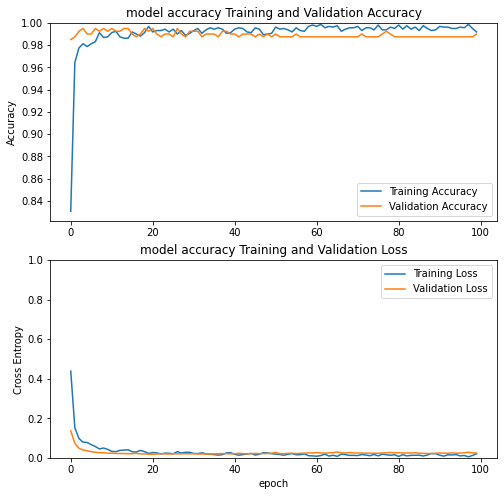

In [19]:
train_histor_view(history, 'model accuracy')

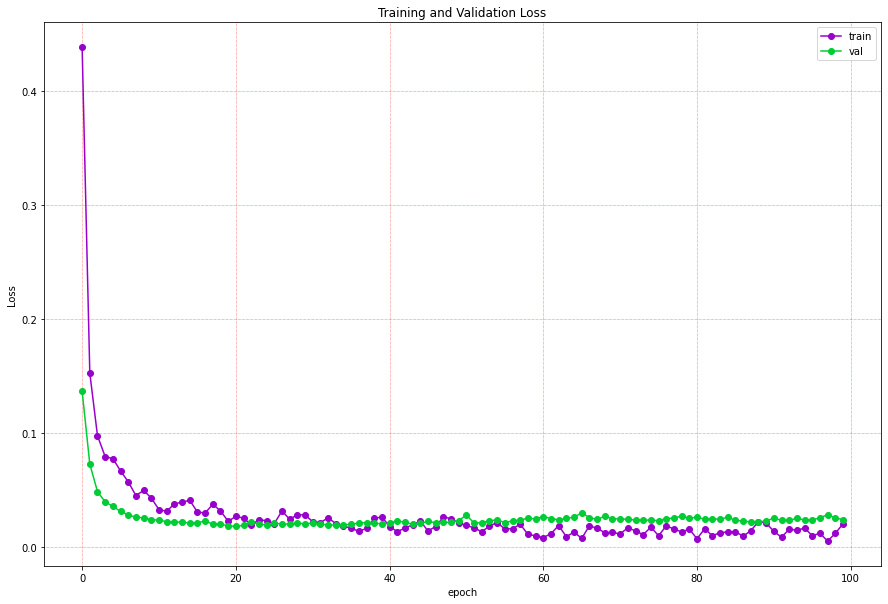

In [20]:
'''


This function plots the training and validation loss of a given model using the history object returned by the fit method.

Inputs:

history: A Keras history object returned by the fit method.
name: A string representing the name of the model.
Output:

A plot of the training and validation loss over epochs.

'''


from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
plt.plot(history.history['loss'], 'o-', color = '#9900CC')
plt.plot(history.history['val_loss'], 'o-', color = '#00cc33')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('nnnnouman_loss_3.png')
plt.show()

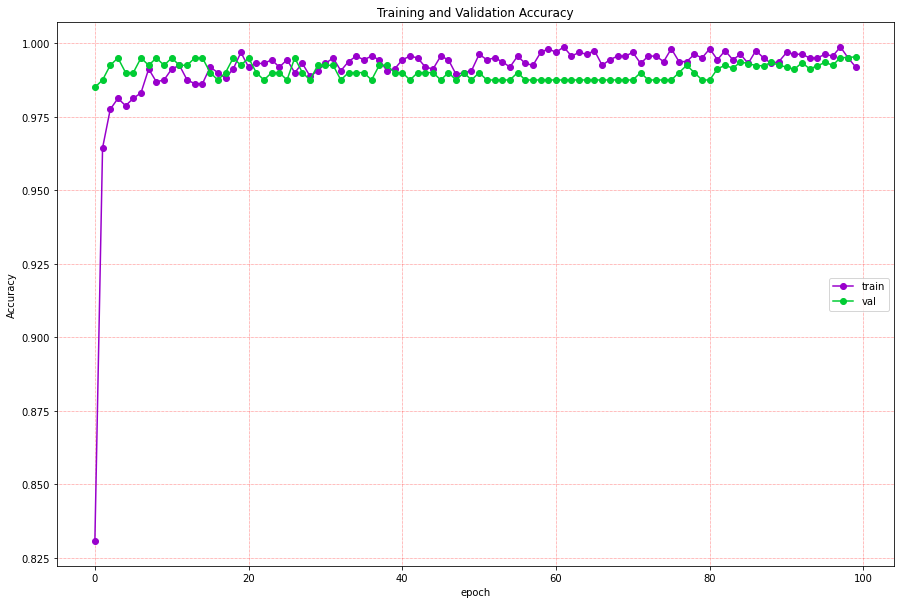

In [30]:
# from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
plt.plot(history.history['accuracy'], 'o-', color = '#9900CC')
plt.plot(history.history['val_accuracy'], 'o-', color = '#00cc33')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center right')
plt.savefig('33nnnnouman_acc3.png')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

##### The following code block evaluates the trained neural network model on the testing set and prints a classification report.


In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(X_test, batch_size=batch_size)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(Y_test.argmax(axis=1), predIdxs,target_names=lb.classes_))


[INFO] evaluating network...
              precision    recall  f1-score   support

    WithMask       0.99      0.98      0.99       200
 WithoutMask       0.99      0.99      0.99       200

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



###### The model.predict() method is used to predict the class labels for the testing set. The np.argmax() function is used to get the index of the predicted class label with the highest probability for each image in the testing set. The classification report is then printed using the classification_report() function from the sklearn.metrics module, which takes the ground truth labels and the predicted labels as input and returns a report that includes various performance metrics like precision, recall, f1-score, and support. The target_names parameter is used to specify the names of the classes in the report.

Confusion matrix, without normalization
[[197   3]
 [  2 198]]


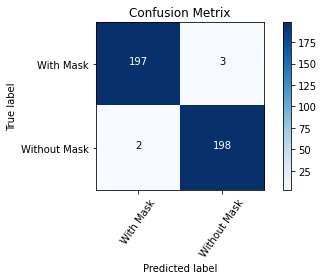

In [ ]:

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    
        Plot a confusion matrix.

    Parameters
    ----------
    cm : array-like of shape (n_classes, n_classes)
        The confusion matrix to plot.

    classes : list of str, shape (n_classes,)
        List of class names.

    normalize : bool, optional (default=False)
        Whether to normalize the confusion matrix or not.

    title : str, optional (default='Confusion matrix')
        The title of the plot.

    cmap : matplotlib colormap, optional (default=plt.cm.Blues)
        The colormap to use in the plot.

    Returns
    -------
    None
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(Y_test.argmax(axis=1), predIdxs)

cm_plot_label =['With Mask', 'Without Mask']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix')

In [ ]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    """
    Calculate sensitivity, specificity, and accuracy for a binary classification problem.
    
    Args:
    - y_test: actual values of the test set (array-like)
    - y_pred_test: predicted values of the test set (array-like)
    
    Returns:
    - sensitivity: proportion of actual positives that are correctly identified (float)
    - specificity: proportion of actual negatives that are correctly identified (float)
    - accuracy: proportion of correct predictions (float)
    """
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity, specificity, accuracy

In [ ]:
'''

This code calculates and prints the sensitivity, specificity, and accuracy of a classification model.

Args:

Y_test: Numpy array or list of true labels for the test set.
predIdxs: Numpy array or list of predicted labels for the test set.


Returns:

sensitivity: Float representing the sensitivity (true positive rate) of the model.
specificity: Float representing the specificity (true negative rate) of the model.
accuracy: Float representing the accuracy of the model.

'''


sensitivity, specificity, accuracy = calculate_sensitivity_specificity(Y_test.argmax(axis=1), predIdxs)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.99
Specificity: 0.985
Accuracy: 0.9875


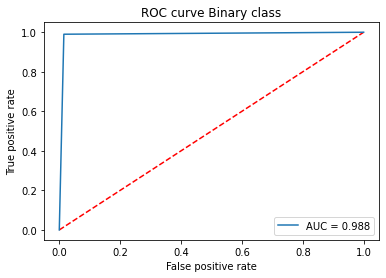

In [ ]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve


"""
Calculates the area under the ROC curve and plots the ROC curve for binary classification.

Parameters:
    Y_test (array): The true labels of the test set.
    predIdxs (array): The predicted class labels or probabilities for the test set.

Returns:
    None
    
Displays:
    The ROC curve for the binary classification problem.
"""



roc_log = roc_auc_score(Y_test.argmax(axis=1), predIdxs)
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test.argmax(axis=1), predIdxs)
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Binary class')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()

###### The function roc_auc_score from the sklearn.metrics module is used to calculate the area under the Receiver Operating Characteristic (ROC) curve, given the true labels and predicted probabilities or scores. The function roc_curve computes the true positive rate, false positive rate, and threshold values for the given true labels and predicted probabilities or scores. The auc function calculates the area under the curve (AUC) for the ROC curve.

The code then plots the ROC curve using the plot function from matplotlib.pyplot. The dashed red line represents the ROC curve for a random classifier. The label argument in plot is used to set the label for the ROC curve, which includes the calculated AUC value. The xlabel, ylabel, and title functions set the labels for the x-axis, y-axis, and the title of the plot, respectively. The legend function adds a legend to the plot indicating the label for the ROC curve.

In [ ]:
# saving and loading the .h5 model

# save model
model.save('GOOGLENET.h5')
print('Model Saved!')

Model Saved!


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# load model
savedModel=load_model('GOOGLENET.h5')
savedModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

### I wrote several functions and code snippets that perform various tasks related to machine learning and data analysis. To ensure that the code is easily understandable and reusable, we added docstrings to explain the purpose of each function and how to use them.

Docstrings are used to provide documentation for functions, classes, and modules in Python. They are enclosed in triple quotes at the beginning of the object definition and describe the object's purpose, arguments, and return values.

I have written a docstrings for several functions that perform tasks such as plotting confusion matrices, calculating sensitivity and specificity, and generating ROC curves. These docstrings make it easy for other users to understand how to use these functions and what they do.

In summary, we described docstrings to document the code and make it more accessible for future use.